In [394]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
dji = pd.read_csv("Processed_DJI.csv")
nasdaq = pd.read_csv("Processed_NASDAQ.csv")
nyse = pd.read_csv("Processed_NYSE.csv")
russell = pd.read_csv("Processed_RUSSELL.csv")
snp = pd.read_csv("Processed_S&P.csv")

In [3]:
dji.head()

,Date,Close,Volume,mom,mom1,mom2,mom3,ROC_5,ROC_10,ROC_15,...,NZD,silver-F,RUSSELL-F,S&P-F,CHF,Dollar index-F,Dollar index,wheat-F,XAG,XAU
0,2009-12-31,10428.049805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.03,0.26,-1.08,-1.00,-0.11,-0.08,-0.06,-0.48,0.30,0.39
1,2010-01-04,10583.959961,NaN,0.014951,NaN,NaN,NaN,NaN,NaN,NaN,...,1.52,3.26,1.61,1.62,-0.57,-0.59,-0.42,3.12,3.91,2.10
2,2010-01-05,10572.019531,NaN,-0.001128,0.014951,NaN,NaN,NaN,NaN,NaN,...,-0.07,1.96,-0.20,0.31,0.43,0.03,0.12,-0.90,1.42,-0.12
3,2010-01-06,10573.679688,0.515598,0.000157,-0.001128,0.014951,NaN,NaN,NaN,NaN,...,0.56,2.15,-0.02,0.07,-0.56,-0.24,-0.17,2.62,2.25,1.77
4,2010-01-07,10606.860352,9.776045,0.003138,0.000157,-0.001128,0.014951,NaN,NaN,NaN,...,-0.72,0.94,0.50,0.40,0.58,0.58,0.54,-1.85,0.22,-0.58


In [390]:
# dji.info()

In [5]:
dji.describe()

,Close,Volume,mom,mom1,mom2,mom3,ROC_5,ROC_10,ROC_15,ROC_20,...,NZD,silver-F,RUSSELL-F,S&P-F,CHF,Dollar index-F,Dollar index,wheat-F,XAG,XAU
count,1984.000000,1981.000000,1983.000000,1982.000000,1981.000000,1980.000000,1979.000000,1974.000000,1969.000000,1964.000000,...,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1982.000000,1984.000000,1984.000000
mean,15446.241546,-0.450989,0.000443,0.000446,0.000447,0.000447,0.218703,0.433604,0.653819,0.880570,...,-0.001507,-0.047314,0.063634,0.043674,-0.002268,0.010726,0.010338,-0.014743,0.010418,0.010025
std,3354.069364,46.181287,0.008681,0.008682,0.008684,0.008686,1.854623,2.454206,2.986855,3.374208,...,0.752757,1.944127,1.254398,0.942540,0.742651,0.483800,0.495002,1.935339,1.832492,1.027910
min,9686.480469,-1407.483531,-0.055464,-0.055464,-0.055464,-0.055464,-10.901642,-14.158489,-14.731013,-14.695105,...,-4.120000,-17.750000,-7.540000,-7.220000,-15.760000,-2.390000,-4.280000,-11.060000,-12.930000,-8.490000
25%,12500.069825,-1.303752,-0.003158,-0.003153,-0.003153,-0.003155,-0.690434,-0.843319,-0.856990,-0.843768,...,-0.450000,-0.952500,-0.570000,-0.342500,-0.340000,-0.270000,-0.270000,-1.190000,-0.840000,-0.520000
50%,15859.979981,-0.673377,0.000535,0.000538,0.000540,0.000538,0.340396,0.596937,0.924413,1.168750,...,-0.010000,-0.030000,0.120000,0.060000,0.000000,0.010000,0.000000,-0.085000,0.030000,0.020000
75%,17813.390625,0.205820,0.004658,0.004659,0.004660,0.004663,1.242932,1.926090,2.581273,3.166024,...,0.470000,0.930000,0.740000,0.500000,0.350000,0.280000,0.280000,1.067500,0.920000,0.570000
max,23563.359375,864.815581,0.042408,0.042408,0.042408,0.042408,7.300404,8.481473,11.809337,12.197779,...,3.430000,12.810000,7.390000,5.440000,9.680000,2.180000,3.980000,12.310000,6.530000,4.800000


# Preprocess data

In [6]:
def preprocess(data,col):
    data = data.fillna(dji.median())    
#     dji["Date"] = pd.to_datetime(dji["Date"] ).values.astype(float) # Converting to date time object
#     data = data.drop(['Name'],axis=1) #Drop Name column
    data = data[col] #Create data with only required number of columns
    return data        

In [7]:
print(dji.columns)
# print(nasdaq.columns)
# print(nyse.columns)
# print(russell.columns)
# print(snp.columns)

Index(['Date', 'Close', 'Volume', 'mom', 'mom1', 'mom2', 'mom3', 'ROC_5',
       'ROC_10', 'ROC_15', 'ROC_20', 'EMA_10', 'EMA_20', 'EMA_50', 'EMA_200',
       'DTB4WK', 'DTB3', 'DTB6', 'DGS5', 'DGS10', 'Oil', 'Gold', 'DAAA',
       'DBAA', 'GBP', 'JPY', 'CAD', 'CNY', 'AAPL', 'AMZN', 'GE', 'JNJ', 'JPM',
       'MSFT', 'WFC', 'XOM', 'FCHI', 'FTSE', 'GDAXI', 'GSPC', 'HSI', 'IXIC',
       'SSEC', 'RUT', 'NYSE', 'TE1', 'TE2', 'TE3', 'TE5', 'TE6', 'DE1', 'DE2',
       'DE4', 'DE5', 'DE6', 'CTB3M', 'CTB6M', 'CTB1Y', 'Name', 'AUD', 'Brent',
       'CAC-F', 'copper-F', 'WIT-oil', 'DAX-F', 'DJI-F', 'EUR', 'FTSE-F',
       'gold-F', 'HSI-F', 'KOSPI-F', 'NASDAQ-F', 'GAS-F', 'Nikkei-F', 'NZD',
       'silver-F', 'RUSSELL-F', 'S&P-F', 'CHF', 'Dollar index-F',
       'Dollar index', 'wheat-F', 'XAG', 'XAU'],
      dtype='object')


In [8]:
col = ['Date', 'Close', 'Volume'] 

# Note just keep Date field as first column as while creating rolling data this field will be ignored

# col = dji.columns
dji = preprocess(dji,col)


# col = nasdaq.columns
nasdaq = preprocess(nasdaq,col)

# col = nyse.columns
nyse = preprocess(nyse,col)

# col = russell.columns
russell = preprocess(russell,col)

# col = snp.columns
snp = preprocess(snp,col)

In [391]:
dji

,Date,Close,Volume
0,2009-12-31,10428.049805,-0.673377
1,2010-01-04,10583.959961,-0.673377
2,2010-01-05,10572.019531,-0.673377
3,2010-01-06,10573.679688,0.515598
4,2010-01-07,10606.860352,9.776045
...,...,...,...
1979,2017-11-09,23461.939453,6.511740
1980,2017-11-10,23422.210938,-0.991838
1981,2017-11-13,23439.699219,-65.347705
1982,2017-11-14,23409.470703,-1.387911


# Visualisation of Close prices

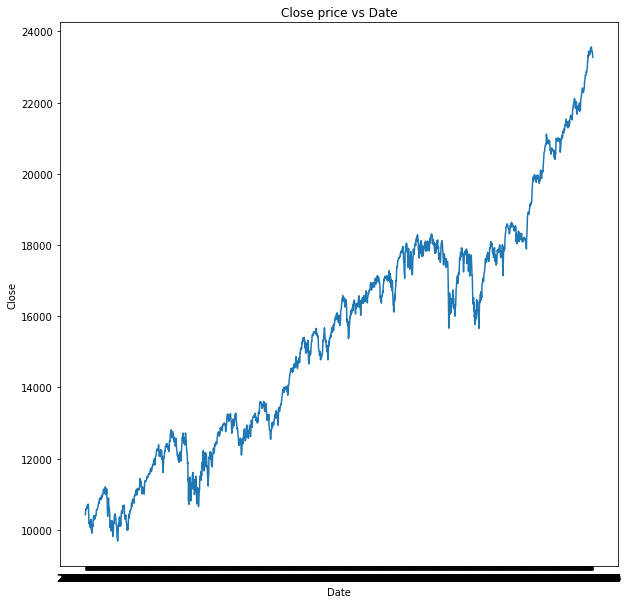

In [399]:
plt.figure(figsize=(10,10))

sns.lineplot(x='Date',y='Close',data =dji)
plt.title('Close price vs Date')
plt.show()

# Create rolling window data

In [10]:
def roll_data(data,roll_window):
    data_mod = pd.DataFrame() # modified data frame with features from previous day values

    for i in range(roll_window,data.shape[0]):# Find corresponding new feature row for each of the given row
        new_feature = []
        for j in range(i-roll_window,i):# loop over all previous day in rolling window
            for k in range(1, len(data.columns)):# loop over all features except date field of previous days
                new_feature.append(data.iloc[j][k])
        new_feature.append(data.iloc[i]['Close'])    # add the true value of Close price for current day
        new_feature.append(data.iloc[i]['Date'])    # add the date field for current day
        data_mod = data_mod.append([new_feature])
    return data_mod.reset_index(drop=True)

In [11]:
# Note: In the modified data, the second last column is true Close price and last column is date

In [14]:
roll_window = 5

dji_mod = roll_data(dji,roll_window)
# nasdaq_mod = roll_data(nasdaq,roll_window)
# nyse_mod = roll_data(nyse,roll_window)
# russell_mod = roll_data(russell,roll_window)
# snp_mod = roll_data(snp,roll_window)

In [80]:
dji_mod

,0,1,2,3,4,5,6,7,8,9,10,11
0,10428.049805,-0.673377,10583.959961,-0.673377,10572.019531,-0.673377,10573.679688,0.515598,10606.860352,9.776045,10618.190430,2010-01-08
1,10583.959961,-0.673377,10572.019531,-0.673377,10573.679688,0.515598,10606.860352,9.776045,10618.190430,-0.838081,10663.990234,2010-01-11
2,10572.019531,-0.673377,10573.679688,0.515598,10606.860352,9.776045,10618.190430,-0.838081,10663.990234,-0.430942,10627.259766,2010-01-12
3,10573.679688,0.515598,10606.860352,9.776045,10618.190430,-0.838081,10663.990234,-0.430942,10627.259766,-6.158991,10680.769531,2010-01-13
4,10606.860352,9.776045,10618.190430,-0.838081,10663.990234,-0.430942,10627.259766,-6.158991,10680.769531,-1.231957,10710.549805,2010-01-14
...,...,...,...,...,...,...,...,...,...,...,...,...
1974,23516.259766,0.228439,23539.189453,-4.851772,23548.419922,-1.775095,23557.230469,1.834186,23563.359375,-0.894487,23461.939453,2017-11-09
1975,23539.189453,-4.851772,23548.419922,-1.775095,23557.230469,1.834186,23563.359375,-0.894487,23461.939453,6.511740,23422.210938,2017-11-10
1976,23548.419922,-1.775095,23557.230469,1.834186,23563.359375,-0.894487,23461.939453,6.511740,23422.210938,-0.991838,23439.699219,2017-11-13
1977,23557.230469,1.834186,23563.359375,-0.894487,23461.939453,6.511740,23422.210938,-0.991838,23439.699219,-65.347705,23409.470703,2017-11-14


# Seperate data for testing last 5 day data for prediction

In [81]:
dji_train = dji_mod[:-5]
dji_test=dji_mod[-5:]

In [82]:
dji_train

,0,1,2,3,4,5,6,7,8,9,10,11
0,10428.049805,-0.673377,10583.959961,-0.673377,10572.019531,-0.673377,10573.679688,0.515598,10606.860352,9.776045,10618.190430,2010-01-08
1,10583.959961,-0.673377,10572.019531,-0.673377,10573.679688,0.515598,10606.860352,9.776045,10618.190430,-0.838081,10663.990234,2010-01-11
2,10572.019531,-0.673377,10573.679688,0.515598,10606.860352,9.776045,10618.190430,-0.838081,10663.990234,-0.430942,10627.259766,2010-01-12
3,10573.679688,0.515598,10606.860352,9.776045,10618.190430,-0.838081,10663.990234,-0.430942,10627.259766,-6.158991,10680.769531,2010-01-13
4,10606.860352,9.776045,10618.190430,-0.838081,10663.990234,-0.430942,10627.259766,-6.158991,10680.769531,-1.231957,10710.549805,2010-01-14
...,...,...,...,...,...,...,...,...,...,...,...,...
1969,23400.859375,-4.641425,23434.189453,-3.141151,23348.740234,-0.786060,23377.240234,-0.790489,23435.009766,0.309024,23516.259766,2017-11-02
1970,23434.189453,-3.141151,23348.740234,-0.786060,23377.240234,-0.790489,23435.009766,0.309024,23516.259766,0.228439,23539.189453,2017-11-03
1971,23348.740234,-0.786060,23377.240234,-0.790489,23435.009766,0.309024,23516.259766,0.228439,23539.189453,-4.851772,23548.419922,2017-11-06
1972,23377.240234,-0.790489,23435.009766,0.309024,23516.259766,0.228439,23539.189453,-4.851772,23548.419922,-1.775095,23557.230469,2017-11-07


In [83]:
dji_test

,0,1,2,3,4,5,6,7,8,9,10,11
1974,23516.259766,0.228439,23539.189453,-4.851772,23548.419922,-1.775095,23557.230469,1.834186,23563.359375,-0.894487,23461.939453,2017-11-09
1975,23539.189453,-4.851772,23548.419922,-1.775095,23557.230469,1.834186,23563.359375,-0.894487,23461.939453,6.511740,23422.210938,2017-11-10
1976,23548.419922,-1.775095,23557.230469,1.834186,23563.359375,-0.894487,23461.939453,6.511740,23422.210938,-0.991838,23439.699219,2017-11-13
1977,23557.230469,1.834186,23563.359375,-0.894487,23461.939453,6.511740,23422.210938,-0.991838,23439.699219,-65.347705,23409.470703,2017-11-14
1978,23563.359375,-0.894487,23461.939453,6.511740,23422.210938,-0.991838,23439.699219,-65.347705,23409.470703,-1.387911,23271.279297,2017-11-15


# Seperate features and target

In [84]:
dji_train.shape[1]

12

In [118]:
# train and validation data
X = dji_train.iloc[:,:-2]
y = dji_train.iloc[:,-2:-1]

# test data
X_test = dji_test.iloc[:,:-2]
y_test = dji_test.iloc[:,-2:-1]

y.rename(columns={10:'target'},inplace=True)
y_test.rename(columns={10:'target'},inplace=True)

In [119]:
X_test

,0,1,2,3,4,5,6,7,8,9
1974,23516.259766,0.228439,23539.189453,-4.851772,23548.419922,-1.775095,23557.230469,1.834186,23563.359375,-0.894487
1975,23539.189453,-4.851772,23548.419922,-1.775095,23557.230469,1.834186,23563.359375,-0.894487,23461.939453,6.511740
1976,23548.419922,-1.775095,23557.230469,1.834186,23563.359375,-0.894487,23461.939453,6.511740,23422.210938,-0.991838
1977,23557.230469,1.834186,23563.359375,-0.894487,23461.939453,6.511740,23422.210938,-0.991838,23439.699219,-65.347705
1978,23563.359375,-0.894487,23461.939453,6.511740,23422.210938,-0.991838,23439.699219,-65.347705,23409.470703,-1.387911


In [120]:
y_test

,target
1974,23461.939453
1975,23422.210938
1976,23439.699219
1977,23409.470703
1978,23271.279297


# Train test split

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=1)

In [96]:
X_val

,0,1,2,3,4,5,6,7,8,9
778,13979.299805,-1.825303,13986.519531,-3.796661,13944.049805,-1.147176,13992.969727,2.118020,13971.240234,-0.530821
757,13435.209961,-0.951623,13384.290039,8.513116,13328.849609,-2.404633,13390.509766,-1.735253,13471.219727,1.001979
1520,15988.080078,-16.391456,16016.019531,-1.130565,15766.740234,0.026071,15882.679688,-0.049165,16093.509766,-0.413755
108,9939.980469,0.747719,9899.250000,-0.173606,10172.530273,-0.479748,10211.070313,-36.846997,10190.889648,-1.018759
948,14776.530273,-3.848144,14802.980469,-1.257770,15126.070313,-6.764401,15237.110352,-2.238036,15301.259766,-0.894164
...,...,...,...,...,...,...,...,...,...,...
133,10366.719727,-0.965281,10359.309570,0.757874,10097.900391,-88.211802,10154.429688,-1.021470,10229.959961,-0.325518
227,11187.280273,0.117915,11091.870117,-1.377876,11052.490234,-5.328637,11006.019531,-0.837462,11255.780273,1.251940
622,12824.389648,0.151792,12573.570313,3.167695,12640.780273,-1.148135,12502.660156,-3.145430,12534.669922,-0.734661
1273,17672.599609,-0.045516,17678.699219,-0.868414,17387.210938,26.824583,17191.369141,-0.805258,17416.849609,-0.407629


In [97]:
y_val

,10
778,14018.700195
757,13488.429688
1520,15885.219727
108,10404.769531
948,15168.009766
...,...
133,10120.530273
227,11362.410156
622,12627.009766
1273,17164.949219


# TensorFlow

In [127]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error

# Regression

# Prameterised Model 

In [253]:
tf.random.set_seed(221)

In [254]:
# MLP with single hidden layer with different hyperparameters
def model_def(num_nodes,activation_type,loss_value,opt,xtrain,ytrain,size_batch,num_epochs,xvalid, yvalid):
    model = Sequential()
    #First hidden layer
    model.add(Dense(num_nodes, input_dim=10, activation=activation_type))
    #Output layer
    model.add(Dense(1, activation='linear'))
    #Compiling the model
    model.compile(loss = loss_value,optimizer = opt)
    #Fitting the model
    history = model.fit(xtrain, ytrain,batch_size=size_batch,epochs=num_epochs, validation_data=(xvalid, yvalid), verbose = 0)
    return model,history

In [255]:
# Plot loss vs epochs for training and validation data
def plot_train_valid_loss(history_var):
    plt.figure(figsize=(10,5))
    plt.plot(history_var.history['loss'])
    plt.plot(history_var.history['val_loss'])
    plt.title('Loss across Epochs')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()

In [256]:
def test_output(model,xtest,ytest):
    y_pred = pd.DataFrame(model.predict(xtest),columns=['Predicted_Value'])
    my_new_df = pd.concat([ytest, y_pred], axis =1)
    my_new_df['%_error'] = 100*(my_new_df['Predicted_Value']-my_new_df['target'])/my_new_df['target']
    mse = mean_squared_error(ytest, y_pred)
    return my_new_df,mse

   # Varying nodes in hidden layer

# Setting 1

In [290]:
opt = tf.keras.optimizers.Adam()

In [291]:
model1,history1 = model_def(5,'relu','mean_squared_error',opt,X_train, y_train,80,40,X_val, y_val)

In [292]:
train_loss1 = history1.history['loss'][-1]
valid_loss1 = history1.history['val_loss'][-1]

In [293]:
print('train loss',train_loss1)
print('valid loss',valid_loss1)

train loss 34404.5234375
valid loss 39066.1015625


In [294]:
test_res1, test_loss1 = test_output(model1,X_test,y_test)

In [295]:
print('test loss', test_loss1)

test loss 16147.649791179128


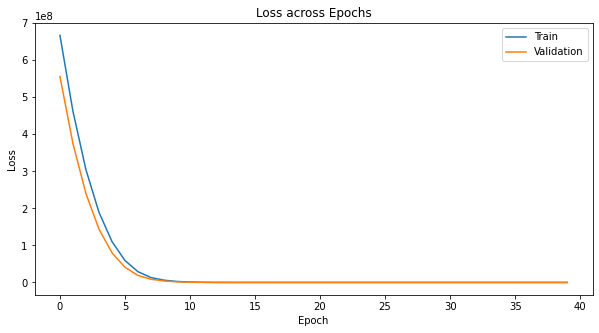

In [296]:
plot_train_valid_loss(history1)

# Setting 2 

In [297]:
model2,history2 = model_def(10,'relu','mean_squared_error',opt,X_train, y_train,80,40,X_val, y_val)

In [298]:
train_loss2 = history2.history['loss'][-1]
valid_loss2 = history2.history['val_loss'][-1]

In [299]:
print('train loss',train_loss2)
print('valid loss',valid_loss2)

train loss 18174.693359375
valid loss 20178.951171875


In [300]:
test_res2, test_loss2 = test_output(model2,X_test,y_test)

In [301]:
print('test loss', test_loss2)

test loss 13492.908972341684


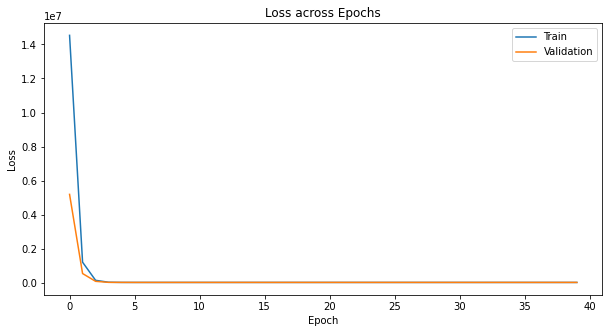

In [302]:
plot_train_valid_loss(history2)

# Setting 3

In [303]:
model3,history3 = model_def(30,'relu','mean_squared_error',opt,X_train, y_train,80,40,X_val, y_val)

In [304]:
train_loss3 = history3.history['loss'][-1]
valid_loss3 = history3.history['val_loss'][-1]

In [305]:
print('train loss',train_loss3)
print('valid loss',valid_loss3)

train loss 34741.984375
valid loss 39860.0546875


In [306]:
test_res3, test_loss3 = test_output(model3,X_test,y_test)

In [307]:
print('test loss', test_loss3)

test loss 25788.14780239382


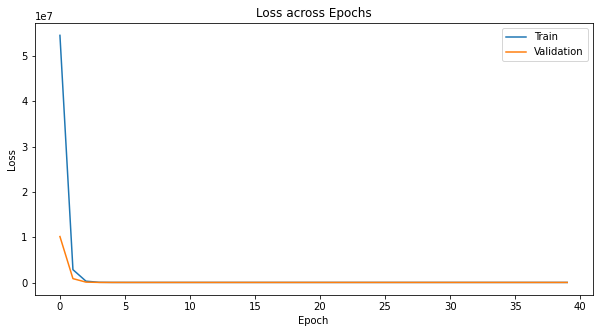

In [308]:
plot_train_valid_loss(history3)

In [309]:
# Choosing numbetr of nodes as 10 as it gives min validation loss

# Varying Activation functions

# Setting 4

In [313]:
model4,history4 = model_def(10,'sigmoid','mean_squared_error',opt,X_train, y_train,80,40,X_val, y_val)

In [314]:
train_loss4 = history4.history['loss'][-1]
valid_loss4 = history4.history['val_loss'][-1]

In [315]:
print('train loss',train_loss4)
print('valid loss',valid_loss4)

train loss 248754240.0
valid loss 250729600.0


In [316]:
test_res4, test_loss4 = test_output(model4,X_test,y_test)

In [317]:
print('test loss', test_loss4)

test loss 547034853.2101434


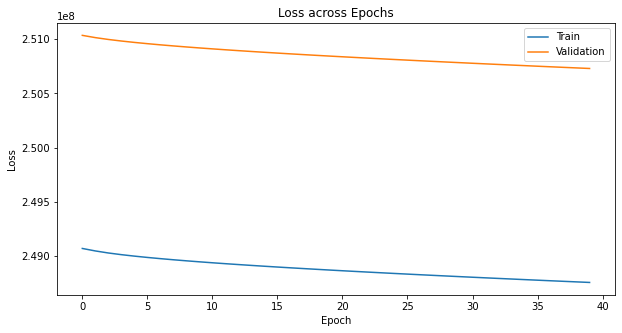

In [318]:
plot_train_valid_loss(history4)

# Setting 5

In [328]:
model5,history5 = model_def(10,'tanh','mean_squared_error',opt,X_train, y_train,80,40,X_val, y_val)

In [329]:
train_loss5 = history5.history['loss'][-1]
valid_loss5 = history5.history['val_loss'][-1]

In [330]:
print('train loss',train_loss5)
print('valid loss',valid_loss5)

train loss 248501728.0
valid loss 250473072.0


In [331]:
test_res5, test_loss5 = test_output(model5,X_test,y_test)

In [332]:
print('test loss', test_loss5)

test loss 546648102.7412992


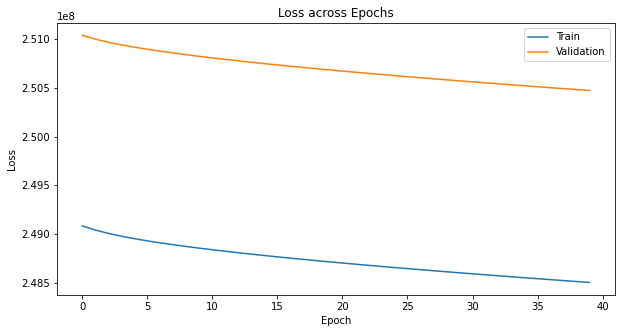

In [333]:
plot_train_valid_loss(history5)

# Varying optimiser learning rate

# Setting 6

In [372]:
opt = tf.keras.optimizers.SGD(learning_rate=0.001)

In [373]:
model6,history6 = model_def(10,'relu','mean_squared_error',opt,X_train, y_train,80,40,X_val, y_val)

In [374]:
train_loss6 = history6.history['loss'][-1]
valid_loss6 = history6.history['val_loss'][-1]

In [375]:
print('train loss',train_loss6)
print('valid loss',valid_loss6)

train loss 6.252024112311605e+24
valid loss 5.980456334205224e+24


In [376]:
test_res6, test_loss6 = test_output(model6,X_test,y_test)

In [377]:
print('test loss', test_loss6)

test loss 5.980456051752951e+24


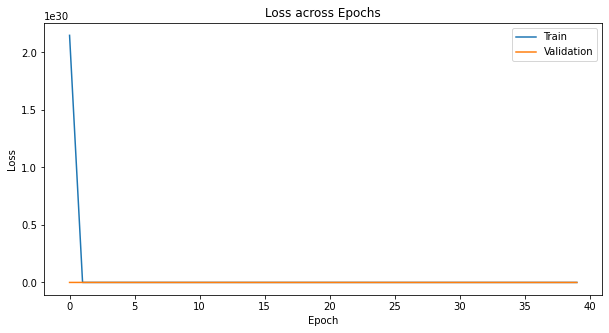

In [378]:
plot_train_valid_loss(history6)

# Setting 7

In [443]:
opt = tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.9)

In [444]:
model7,history7 = model_def(10,'relu','mean_squared_error',opt,X_train, y_train,80,40,X_val, y_val)

In [445]:
train_loss7 = history7.history['loss'][-1]
valid_loss7 = history7.history['val_loss'][-1]

In [446]:
print('train loss',train_loss7)
print('valid loss',valid_loss7)

train loss nan
valid loss nan


In [447]:
test_res7, test_loss7 = test_output(model7,X_test,y_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [419]:
print('test loss', test_loss7)

test loss 547606358.9098917


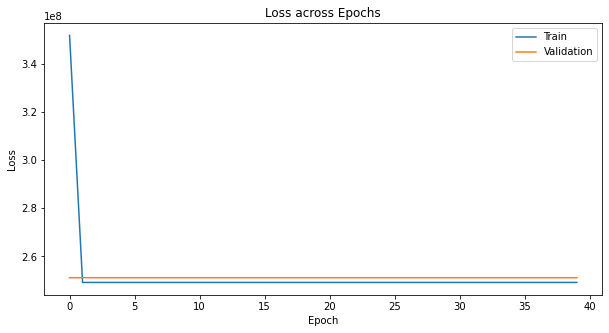

In [420]:
plot_train_valid_loss(history7)

# Setting 8

In [461]:
opt = tf.keras.optimizers.Adam()

In [462]:
model8,history8 = model_def(10,'relu','MeanAbsoluteError',opt,X_train, y_train,80,40,X_val, y_val)

In [463]:
train_loss8 = history8.history['loss'][-1]
valid_loss8 = history8.history['val_loss'][-1]

In [464]:
print('train loss',train_loss8)
print('valid loss',valid_loss8)

train loss 124.91815185546875
valid loss 128.2273712158203


In [465]:
test_res8, test_loss8 = test_output(model8,X_test,y_test)

In [466]:
print('test loss', test_loss8)

test loss 20662.789308321826


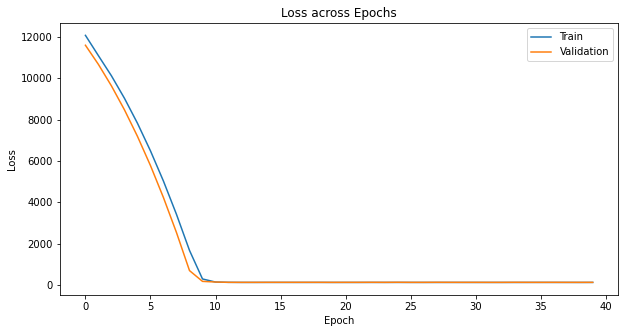

In [467]:
plot_train_valid_loss(history8)